Importing all required libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
import scipy

from scipy.stats import pearsonr
import sklearn
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

Loading CSV file and identifying the features and outcome

In [14]:
# load csv file and display some rows
all_df=pd.read_csv("C:\\Users\\GIFT OF GOD\\Desktop\\JP\\ML_LAB\\WDBC.csv", index_col=False)
all_df.head()
# ID column is not useful, drop it
all_df.drop('ID', axis=1, inplace=True)
all_df.head()


,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractual dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
# Assign features to X
X = all_df.drop('Diagnosis', axis=1)
# Identify the outcome
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
all_df['Diagnosis'] = le.fit_transform(all_df['Diagnosis'])
all_df.head()
# assign numerical label to y
y = all_df['Diagnosis']

In [16]:
all_df.head()

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractual dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Normalising the features to use zero mean normalisation

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

<AxesSubplot: >

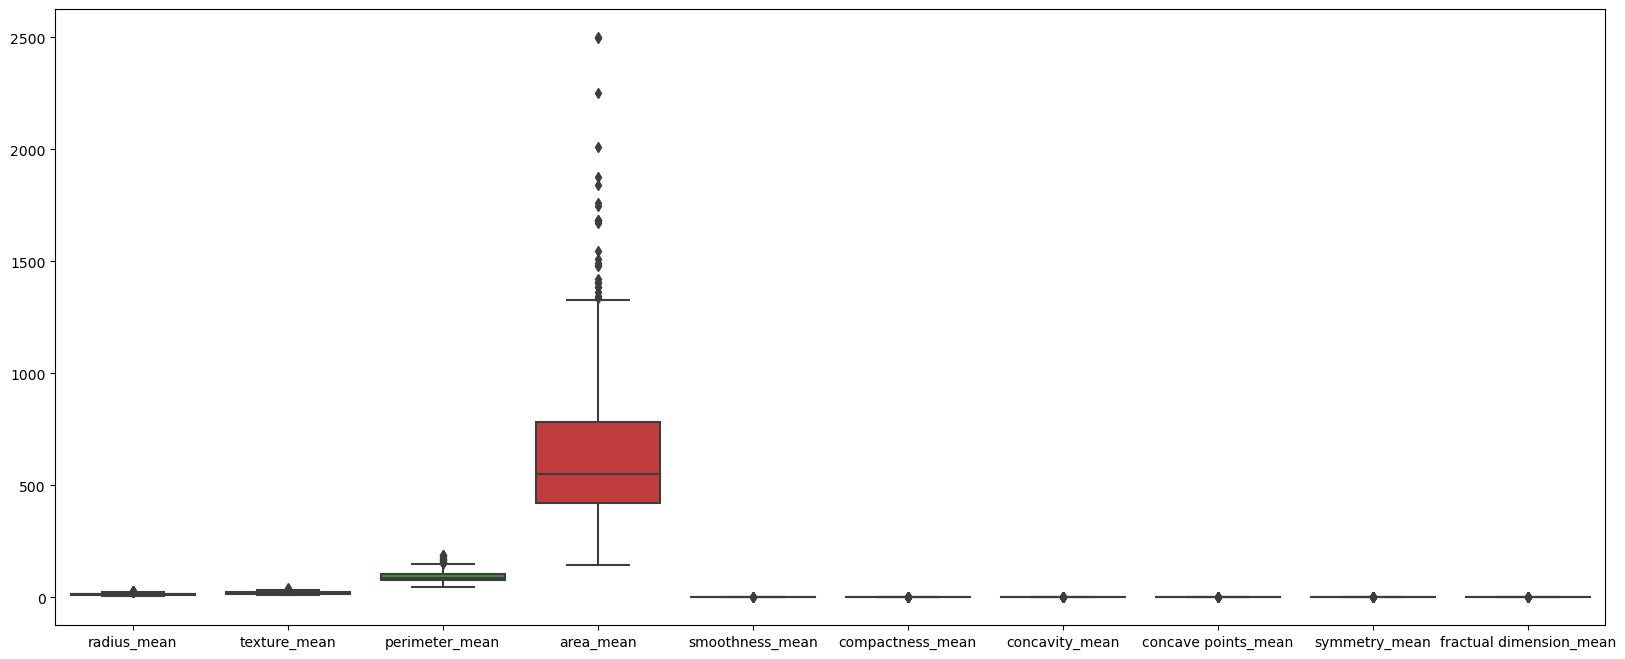

In [18]:
fig,ax=plt.subplots(1,figsize=(20,8))
sns.boxplot(data=all_df.iloc[:, 1:11],ax=ax)

Performing PCA and retain the first 3 principal components

In [7]:
from sklearn.decomposition import PCA
feature_names = list(X.columns)
pca = PCA(n_components=10)
Xs_pca = pca.fit_transform(Xs)
Xs_pca=Xs_pca[:,0:3] #retain the first 3 PC

Building a Multiple Layer Perceptron Neural Network

In [8]:
# The model is built using Sequential API in Keras.
# This model contains 3 input neurons, 10 neurons in hidden layer and 1
# output neuron for binary classification
# You may design your own network structure for the task you have

# The activation function will be different for regression (linear) or multi-class
# classification (softmax)
model=keras.models.Sequential()
model.add(keras.layers.Dense(10, input_dim=3,activation="relu"))
model.add(keras.layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                40        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


Compiling the model

In [9]:
#After a model is created we need to compile the model to specify the loss
# function and optimiser
#If you use one-hot encoding for multi-class you need to use
# 'categorical_crossentropy'
# If you use class index e.g. from 0 to 3, you can use
# 'sparse_categorical_crossentropy'
model.compile(loss="binary_crossentropy", optimizer="sgd",
metrics=["accuracy"])
# save the initial weight for initilise new models in cross validation
model.save_weights('model.h5')


A quick test of the model using 80% / 20% training and testing split

In [10]:
# Then we split the data to train and test 80%/20%
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs_pca, y, test_size=0.2,
random_state=1, stratify=y)
# Now we can start the training
# Tensorflow/Keras uses np array, so need to convert the data format
#make sure the weights are initialised
model.load_weights('model.h5')
# Model learning
history= model.fit(np.array(Xs_train), np.array(y_train), epochs=50,
validation_data=(np.array(Xs_test), np.array(y_test)))


Epoch 1/50
15/15 [==============================] - 1s 33ms/step - loss: 0.9714 - accuracy: 0.2769 - val_loss: 0.7459 - val_accuracy: 0.4211
Epoch 2/50
15/15 [==============================] - 0s 7ms/step - loss: 0.6879 - accuracy: 0.5275 - val_loss: 0.5663 - val_accuracy: 0.7368
Epoch 3/50
15/15 [==============================] - 0s 7ms/step - loss: 0.5329 - accuracy: 0.8176 - val_loss: 0.4671 - val_accuracy: 0.8860
Epoch 4/50
15/15 [==============================] - 0s 7ms/step - loss: 0.4457 - accuracy: 0.9055 - val_loss: 0.3999 - val_accuracy: 0.9211
Epoch 5/50
15/15 [==============================] - 0s 7ms/step - loss: 0.3854 - accuracy: 0.9209 - val_loss: 0.3513 - val_accuracy: 0.9211
Epoch 6/50
15/15 [==============================] - 0s 7ms/step - loss: 0.3415 - accuracy: 0.9253 - val_loss: 0.3160 - val_accuracy: 0.9211
Epoch 7/50
15/15 [==============================] - 0s 7ms/step - loss: 0.3100 - accuracy: 0.9319 - val_loss: 0.2887 - val_accuracy: 0.9386
Epoch 8/50
15/15 [=

Visualising the training process, loss and accuracy

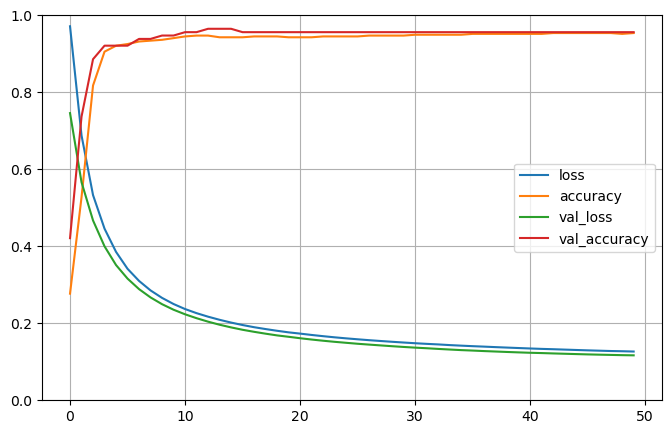

In [11]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Performing a K-fold cross validation. Observe the training process of each fold.
We will also visualise the training process using Tensorboard later.

In [21]:
from sklearn.model_selection import KFold
import os
# root file for logging the learning process and can be visualised later in
# tensorboard
root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
 import time
 run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
 return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()
kf = KFold(n_splits=5)
k=1
for train_index, test_index in kf.split(Xs_pca):
    print("fold",k)
    # initialise the weight for each fold
    model.load_weights('model.h5')
    # Split the data
    X_train, X_test = Xs_pca[train_index], Xs_pca[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # tensorboard for visualising the training process later
    tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
    # training and validation
    model.fit(np.array(X_train), np.array(y_train), epochs=20,
    validation_data=(np.array(X_test),
    np.array(y_test)),callbacks=[tensorboard_cb])

    #save the model of each fold
    model.save(os.path.join('fold_{}_model.hdf5'.format(k)))

    # evaluate the accuracy of each fold
    scores = model.evaluate(np.array(X_test), np.array(y_test), verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    k=k+1

fold 1
Epoch 1/20
15/15 [==============================] - 0s 16ms/step - loss: 0.9546 - accuracy: 0.2637 - val_loss: 0.8338 - val_accuracy: 0.4211
Epoch 2/20
15/15 [==============================] - 0s 8ms/step - loss: 0.6744 - accuracy: 0.5758 - val_loss: 0.6517 - val_accuracy: 0.6754
Epoch 3/20
15/15 [==============================] - 0s 8ms/step - loss: 0.5203 - accuracy: 0.8615 - val_loss: 0.5512 - val_accuracy: 0.7456
Epoch 4/20
15/15 [==============================] - 0s 8ms/step - loss: 0.4299 - accuracy: 0.8945 - val_loss: 0.4870 - val_accuracy: 0.7719
Epoch 5/20
15/15 [==============================] - 0s 8ms/step - loss: 0.3694 - accuracy: 0.9143 - val_loss: 0.4395 - val_accuracy: 0.7807
Epoch 6/20
15/15 [==============================] - 0s 8ms/step - loss: 0.3271 - accuracy: 0.9319 - val_loss: 0.4051 - val_accuracy: 0.7982
Epoch 7/20
15/15 [==============================] - 0s 8ms/step - loss: 0.2958 - accuracy: 0.9363 - val_loss: 0.3772 - val_accuracy: 0.8158
Epoch 8/20
1

Predicting on new data

In [24]:
#load one model to do prediction
model.load_weights('fold_5_model.hdf5')
# You can use “predict” to predict output in the range of [0 1]
y_pred=model.predict(np.array(X_test))
# Or use model.evaluate to get the accuracy if the true labels are known
# Here we use the test data of the last fold as an example,
# in practice this should be an independent test set
loss, acc = model.evaluate(np.array(X_test), np.array(y_test), verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

4/4 [==============================] - 0s 3ms/step
4/4 - 0s - loss: 0.1804 - accuracy: 0.9558 - 57ms/epoch - 14ms/step
Restored model, accuracy: 95.58%
